In [123]:
from maticalgos.historical import historical

ma = historical('')
ma.login("")

In [124]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed, dump, load
from sqlalchemy import create_engine

In [125]:
dates = []
current_date = datetime.date(2019,3,1)

while current_date<datetime.datetime.now().date():
    dates.append(current_date)
    current_date += datetime.timedelta(days = 1)

In [127]:
data = ma.get_data("nifty", datetime.date(2024,2,15))

In [133]:
data['expiry'] = data['symbol'].apply(lambda x: x[5:12])
data.expiry.value_counts()

expiry
15FEB24    38431
-I           376
             375
Name: count, dtype: int64

In [187]:
nifty_data = []
options_data = []

def data_maker(i):
    try:

        data = ma.get_data("nifty", i)

        nifty_prices = data[data['symbol']=='NIFTY']

        nifty_prices['datetime'] = nifty_prices['date'] + ' ' + nifty_prices['time']
        nifty_prices['datetime'] = pd.to_datetime(nifty_prices['datetime'])
        nifty_prices.set_index(nifty_prices['datetime'], inplace=True)
        nifty_prices.drop(columns=['date','datetime','time'], inplace=True)
        nifty_prices[['close', 'high', 'low', 'oi', 'open', 'volume']] = nifty_prices[['close', 'high', 'low', 'oi', 'open', 'volume']].astype(float)


        data['datetime'] = data['date'] + ' ' + data['time']
        data['datetime'] = pd.to_datetime(data['datetime'])
        data.set_index(data['datetime'], inplace=True)
        data.drop(columns=['date','datetime','time'], inplace=True)
        data[['close', 'high', 'low', 'oi', 'open', 'volume']] = data[['close', 'high', 'low', 'oi', 'open', 'volume']].astype(float)

        data = data[(data['symbol'] != 'NIFTY') & (data['symbol'] != 'NIFTY-I')]
        data['expiry'] = pd.to_datetime(data['symbol'].apply(lambda x:x[5:12]))
        data['strike'] = data['symbol'].apply(lambda x:x[12:-2])
        data['ce_pe'] = data['symbol'].apply(lambda x:x[-2:])
        data[['strike']] = data[['strike']].astype(float)

        nifty_data.append(nifty_prices)
        options_data.append(data)

    except Exception as e:
        nifty_prices, data = None, None
        
        pass
    
    return nifty_prices, data


In [208]:
#results = Parallel(n_jobs=-1, verbose=True)(delayed(data_maker)(i) for i in dates)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 2244 out of 2244 | elapsed: 11.2min finished


In [ ]:
my_list_loaded = load("option_data.joblib")
my_list_loaded

In [ ]:
nifty_loaded = load("nifty_data.joblib")
nifty_loaded

In [5]:
nifty = pd.concat(nifty_loaded)

In [6]:
options = pd.concat(my_list_loaded)

In [7]:
# engine = create_engine('sqlite:///option_pices_db.db')

In [8]:
#options.to_sql('options_data', engine, index = False, if_exists='replace', chunksize=10000)
# conn = engine.connect()
# conn.close()

In [9]:
options

,close,high,low,oi,open,symbol,volume,expiry,strike,ce_pe
datetime,,,,,,,,,,
2019-03-01 09:15:00,4.65,4.75,4.65,406050.0,4.75,NIFTY07MAR1910000PE,1125.0,2019-03-07,10000.0,PE
2019-03-01 09:16:00,3.90,4.65,3.60,406050.0,4.65,NIFTY07MAR1910000PE,8625.0,2019-03-07,10000.0,PE
2019-03-01 09:17:00,3.90,3.95,3.70,406050.0,3.90,NIFTY07MAR1910000PE,6600.0,2019-03-07,10000.0,PE
2019-03-01 09:18:00,3.75,3.90,3.75,406800.0,3.90,NIFTY07MAR1910000PE,9000.0,2019-03-07,10000.0,PE
2019-03-01 09:19:00,3.60,3.85,3.60,406800.0,3.75,NIFTY07MAR1910000PE,6450.0,2019-03-07,10000.0,PE
...,...,...,...,...,...,...,...,...,...,...
2024-12-31 15:26:00,0.75,0.80,0.75,10328475.0,0.75,NIFTY02JAN2526500CE,533025.0,2025-01-02,26500.0,CE
2024-12-31 15:27:00,0.80,0.80,0.75,10328475.0,0.80,NIFTY02JAN2526500CE,60825.0,2025-01-02,26500.0,CE
2024-12-31 15:28:00,0.75,0.80,0.75,10406400.0,0.75,NIFTY02JAN2526500CE,15150.0,2025-01-02,26500.0,CE


In [10]:
nifty

,close,high,low,oi,open,symbol,volume
datetime,,,,,,,
2019-03-01 09:15:00,10855.10,10860.80,10839.65,NaN,10842.65,NIFTY,0.0
2019-03-01 09:16:00,10852.85,10856.55,10852.00,NaN,10856.30,NIFTY,0.0
2019-03-01 09:17:00,10848.45,10853.60,10848.45,NaN,10852.35,NIFTY,0.0
2019-03-01 09:18:00,10845.30,10849.90,10843.60,NaN,10848.90,NIFTY,0.0
2019-03-01 09:19:00,10851.05,10851.30,10844.30,NaN,10844.75,NIFTY,0.0
...,...,...,...,...,...,...,...
2024-12-31 15:25:00,23656.40,23656.40,23646.50,NaN,23648.70,NIFTY,0.0
2024-12-31 15:26:00,23657.65,23663.30,23655.75,NaN,23655.75,NIFTY,0.0
2024-12-31 15:27:00,23658.75,23659.80,23651.95,NaN,23657.45,NIFTY,0.0


In [11]:
ce_options = options[options['ce_pe']=='PE']
ce_options.sort_index(inplace=True)
ce_options = ce_options[['close', 'expiry', 'strike']]

In [12]:
a = ce_options.copy()

In [14]:
a = a.groupby([a.index.date, 'strike']).agg({
    'close': ['first', 'last'],
    'expiry': 'first'
})

In [16]:
a = a.reset_index()

In [18]:
a.index = pd.to_datetime(a['level_0'])
a.drop(columns=['level_0'], inplace=True)
a.index.name = 'Date'

In [19]:
a.columns = ['strike','option_open','option_close','expiry']

In [20]:
a

,strike,option_open,option_close,expiry
Date,,,,
2019-03-01,9100.0,2.00,0.85,2019-03-07
2019-03-01,9500.0,2.00,1.00,2019-03-07
2019-03-01,10000.0,4.65,2.45,2019-03-07
2019-03-01,10100.0,6.00,2.90,2019-03-07
2019-03-01,10200.0,9.00,4.00,2019-03-07
...,...,...,...,...
2024-12-31,25500.0,1978.75,1801.55,2025-01-02
2024-12-31,25600.0,1905.00,1905.00,2025-01-02
2024-12-31,25700.0,2085.00,2017.00,2025-01-02


In [21]:
b = nifty.copy()
b = b.close.to_frame()

b = b.groupby(b.index.date).agg(['first','last'])

b.columns = ['nifty_open', 'nifty_close']

b = b.reset_index()
b.index = pd.to_datetime(b['index'])
b.drop(columns=['index'], inplace=True)

b.index = pd.to_datetime(b.index)

In [22]:
b

,nifty_open,nifty_close
index,,
2019-03-01,10855.10,10861.35
2019-03-05,10832.75,10985.65
2019-03-06,11032.05,11049.10
2019-03-07,11066.45,11051.45
2019-03-08,11017.80,11038.45
...,...,...
2024-12-24,23761.15,23730.35
2024-12-26,23794.85,23760.30
2024-12-27,23819.50,23832.45


In [23]:
df = pd.concat([a,b], axis = 1)

In [24]:
#df = a.copy()
df['atm'] = (round(df['nifty_open']/50)*50)
#df = df[df['strike']==df['atm']]

In [116]:
c = df.loc['2024']

In [117]:
c

,strike,option_open,option_close,expiry,nifty_open,nifty_close,atm
2024-01-01,18300.0,1.10,1.40,2024-01-04,21710.40,21689.45,21700.0
2024-01-01,18350.0,1.10,1.45,2024-01-04,21710.40,21689.45,21700.0
2024-01-01,18400.0,1.10,1.35,2024-01-04,21710.40,21689.45,21700.0
2024-01-01,18450.0,1.05,1.35,2024-01-04,21710.40,21689.45,21700.0
2024-01-01,18500.0,1.00,1.10,2024-01-04,21710.40,21689.45,21700.0
...,...,...,...,...,...,...,...
2024-12-31,25500.0,1978.75,1801.55,2025-01-02,23551.35,23668.80,23550.0
2024-12-31,25600.0,1905.00,1905.00,2025-01-02,23551.35,23668.80,23550.0
2024-12-31,25700.0,2085.00,2017.00,2025-01-02,23551.35,23668.80,23550.0
2024-12-31,26000.0,2420.00,2303.45,2025-01-02,23551.35,23668.80,23550.0


In [118]:
dates = np.unique(c.index.date)

In [120]:
trade = False
capital = 1000000
lot_size = 25
slippage = 0.01
profits = []

for i in dates:
    
    d = c[c.index.date == i]
    
    if trade == False:
        
        option_shares = np.floor(capital/(d.iloc[0]['nifty_open']*lot_size))*lot_size
        
        atm = d.iloc[0]['atm']
        entry_date = d.index[0]
        expiry_date = d.iloc[0]['expiry']
        
        entry_price = d[d['strike'] == atm]['option_open'].values[0]
                
        trade = True
        
    if (trade == True) & (d.index[0].date() == expiry_date.date()):
        
        
        exit_price = d[d['strike'] == atm]['option_close'].values[0]
        
        pnl = (entry_price-exit_price)*option_shares
        
        
        profits.append([entry_date,expiry_date,entry_price, exit_price, pnl, capital])
        
        capital+=pnl
        
        trade = False

In [121]:
profits_df = pd.DataFrame(profits, columns = ['entry_date','expiry_date','entry_price', 'exit_price', 'pnl', 'capital'])
profits_df.set_index('entry_date', drop = True, inplace=True)
profits_df

,expiry_date,entry_price,exit_price,pnl,capital
entry_date,,,,,
2024-01-01,2024-01-04,110.85,41.30,1738.75,1000000.00
2024-01-05,2024-01-11,116.30,103.10,330.00,1001738.75
2024-01-12,2024-01-18,144.05,287.70,-3591.25,1002068.75
2024-01-19,2024-01-25,134.90,248.10,-2830.00,998477.50
2024-01-29,2024-02-01,154.70,0.05,3866.25,995647.50
2024-02-02,2024-02-08,145.45,132.05,335.00,999513.75
2024-02-09,2024-02-15,158.25,0.05,3955.00,999848.75
2024-02-16,2024-02-22,144.55,0.05,3612.50,1003803.75
2024-02-23,2024-02-29,155.00,267.85,-2821.25,1007416.25


<Axes: xlabel='entry_date'>

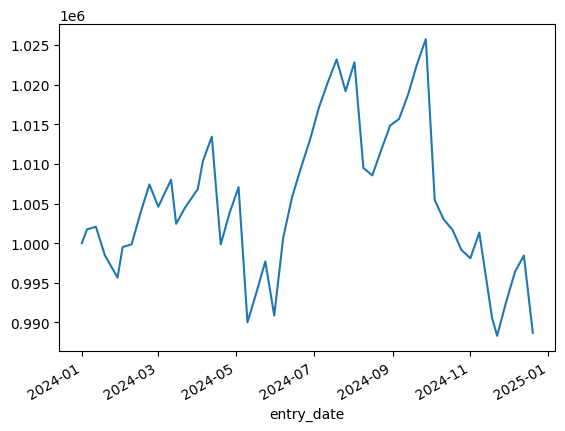

In [122]:
profits_df['capital'].plot()

In [822]:
trade = False
capital = 1000000
lot_size = 25
slippage = 0.01
profits = []
premiums_des = []

for i in range(len(df)):
    if trade == False:
        
        #nifty_shares = capital/df.iloc[i]['nifty_open']
        #nifty_shares = np.floor(nifty_shares)
        
        option_shares = capital/(df.iloc[i]['nifty_open']*lot_size)
        option_shares = np.floor(option_shares)
        option_shares = option_shares*lot_size
        
        strike = df.iloc[i]['strike']
        ce_entry = df.iloc[i]['option_open'] * (1-slippage)
        nifty_entry = df.iloc[i]['nifty_open']
        entry_date = df.index[i]
        
        trade = True
        
    if (trade == True) & (df.index[i] == df.iloc[i]['expiry']):
            ce_exit = df.iloc[i]['option_close'] * (1+slippage)
            nifty_exit =  df.iloc[i]['nifty_close'] 
            
            options_pnl = (ce_entry - ce_exit)*option_shares
            #nifty_pnl = (nifty_exit - nifty_entry)*nifty_shares
            
            #profits.append([df.index[i], options_pnl, option_shares, nifty_pnl, nifty_shares, capital])
            profits.append([entry_date, df.index[i] , ce_entry, ce_exit, nifty_entry, nifty_exit,strike,
                            options_pnl, option_shares, 0, 0, capital])
            premiums_des.append([df.index[i] , df.iloc[i]['option_open'], df.iloc[i]['nifty_open']])
            
            capital+=options_pnl#+nifty_pnl
            trade = False
    

In [823]:
profits_df = pd.DataFrame(profits,columns=['date','exit_date','premium','premium_exit','nifty_entry', 'nifty_exit','strike',
                                           'op_pnl','op_shares','nifty_pnl','nifty_shares', 'capital'])
profits_df.index = pd.to_datetime(profits_df['date'])
profits_df.drop(columns=['date'], inplace=True)
profits_df['dd'] = (profits_df['capital']-profits_df['capital'].cummax())/profits_df['capital'].cummax()

profits_df

,exit_date,premium,premium_exit,nifty_entry,nifty_exit,strike,op_pnl,op_shares,nifty_pnl,nifty_shares,capital,dd
date,,,,,,,,,,,,
2019-03-01,2019-03-07,81.1800,0.0505,10855.10,11051.45,10850.0,6084.7125,75.0,0,0,1.000000e+06,0.000000
2019-03-08,2019-03-14,58.3605,1.9190,11017.80,11346.80,11000.0,4233.1125,75.0,0,0,1.006085e+06,0.000000
2019-03-15,2019-03-20,74.2005,28.8355,11390.80,11519.10,11400.0,3402.3750,75.0,0,0,1.010318e+06,0.000000
2019-03-22,2019-03-28,69.7950,0.1010,11544.20,11582.95,11550.0,5227.0500,75.0,0,0,1.013720e+06,0.000000
2019-03-29,2019-04-04,78.7050,45.4500,11617.90,11603.85,11600.0,2494.1250,75.0,0,0,1.018947e+06,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,2024-11-28,167.4090,389.0015,23399.65,23957.45,23400.0,-33238.8750,150.0,0,0,3.879408e+06,0.000000
2024-11-29,2024-12-05,152.0640,0.1010,23959.35,24701.55,23950.0,22794.4500,150.0,0,0,3.846169e+06,-0.008568
2024-12-06,2024-12-12,231.3630,102.3635,24693.55,24539.50,24700.0,19349.9250,150.0,0,0,3.868963e+06,-0.002692


In [824]:
profits_df.loc['2020']

,exit_date,premium,premium_exit,nifty_entry,nifty_exit,strike,op_pnl,op_shares,nifty_pnl,nifty_shares,capital,dd
date,,,,,,,,,,,,
2020-01-03,2020-01-09,65.3400,0.0505,12243.30,12216.30,12250.0,4896.7125,75.0,0,0,1.155801e+06,0.000000
2020-01-10,2020-01-16,74.7450,0.0505,12252.85,12354.35,12250.0,5602.0875,75.0,0,0,1.160698e+06,0.000000
2020-01-17,2020-01-23,81.0315,0.0505,12328.35,12179.60,12350.0,6073.5750,75.0,0,0,1.166300e+06,0.000000
2020-01-24,2020-01-30,68.9040,65.0440,12192.55,12023.80,12200.0,289.5000,75.0,0,0,1.172373e+06,0.000000
2020-01-31,2020-02-06,159.0435,0.0505,12081.90,12133.25,12100.0,11924.4750,75.0,0,0,1.172663e+06,0.000000
2020-02-07,2020-02-13,81.7245,25.3005,12124.40,12168.95,12100.0,4231.8000,75.0,0,0,1.184587e+06,0.000000
2020-02-14,2020-02-20,57.6675,19.0385,12219.60,12083.10,12200.0,2897.1750,75.0,0,0,1.188819e+06,0.000000
2020-02-24,2020-02-27,84.8430,17.1700,11956.55,11619.95,11950.0,5075.4750,75.0,0,0,1.191716e+06,0.000000
2020-02-28,2020-03-05,138.6495,81.8100,11351.50,11258.00,11350.0,5683.9500,100.0,0,0,1.196792e+06,0.000000


<Axes: xlabel='date'>

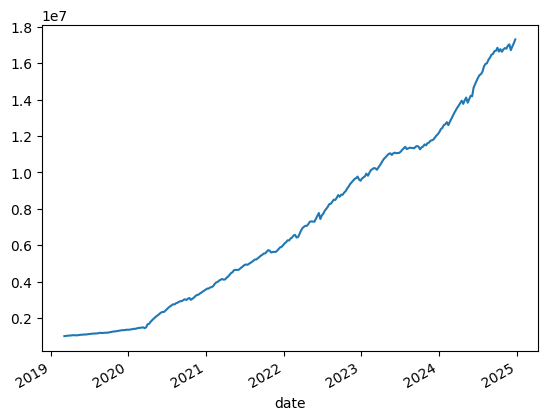

In [790]:
profits_df['capital'].plot()
#plt.yscale('log')

Text(0.5, 1.0, 'Drawdown')

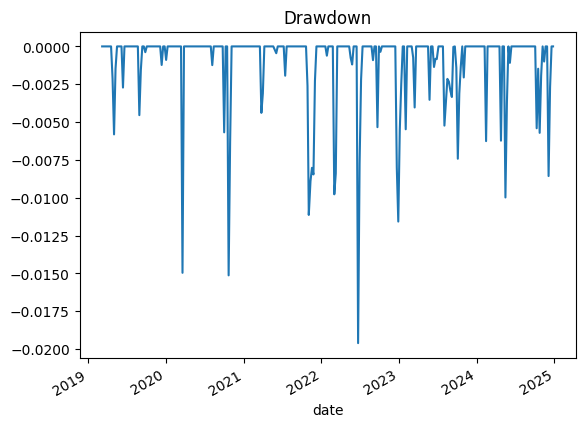

In [778]:
profits_df['dd'].plot()
plt.title('Drawdown')

<Axes: xlabel='date'>

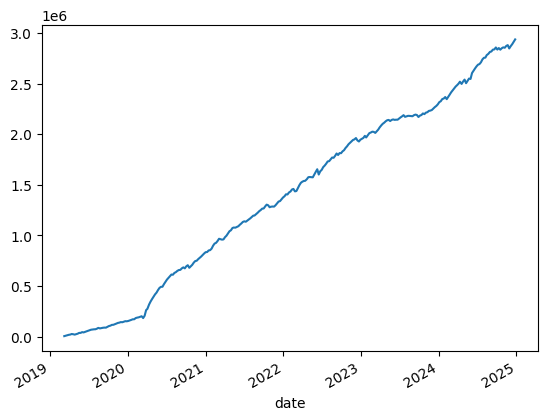

In [779]:
profits_df['op_pnl'].cumsum().plot()

<Axes: >

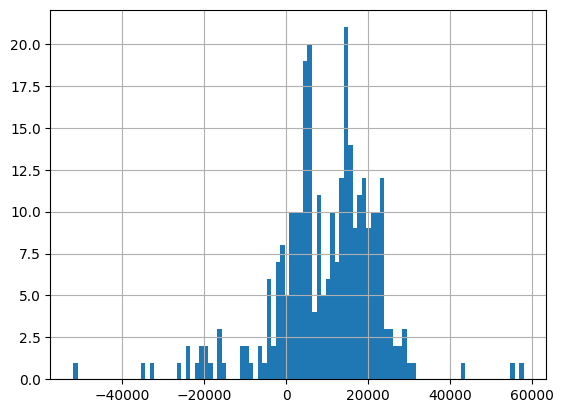

In [780]:
profits_df['op_pnl'].hist(bins = 100)

In [138]:
df1 = pd.read_csv('India VIX Historical Data.csv', index_col=0, parse_dates=True).sort_index()['Price'].to_frame().loc['2015':]

In [139]:
df1.describe()

,Price
count,2548.000000
mean,16.928672
std,6.212067
min,10.135000
25%,13.523750
50%,15.593750
75%,18.623125
max,83.607500


In [782]:
premiums_des_df = pd.DataFrame(premiums_des, columns=['date', 'premium','nifty_price'])
premiums_des_df.set_index('date', drop=True, inplace=True)
premiums_des_df['ratio'] = (premiums_des_df['premium']/premiums_des_df['nifty_price'])*100

# premiums_des_df = pd.concat([premiums_des_df,df1], axis=1).dropna()
premiums_des_df

,premium,nifty_price,ratio
date,,,
2019-03-07,26.40,11066.45,0.238559
2019-03-14,22.65,11364.35,0.199307
2019-03-20,32.90,11534.15,0.285240
2019-03-28,21.20,11468.35,0.184857
2019-04-04,34.60,11641.70,0.297207
...,...,...,...
2024-11-28,62.70,24300.70,0.258017
2024-12-05,121.60,24499.95,0.496328
2024-12-12,63.30,24626.15,0.257044


<Axes: >

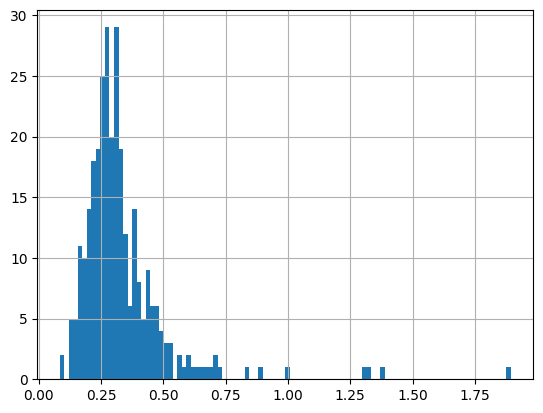

In [783]:
premiums_des_df['ratio'].hist(bins=100)

In [784]:
premiums_des_df['ratio'].describe()

count    302.000000
mean       0.333642
std        0.185843
min        0.084934
25%        0.240585
50%        0.294460
75%        0.375991
max        1.894111
Name: ratio, dtype: float64

In [607]:
1.003**53

1.1720589352374657

In [608]:
1+(0.003*53)

1.159

In [563]:
24000*75

1800000

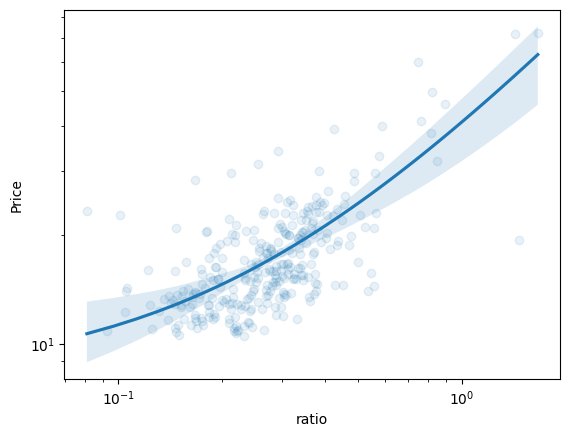

In [620]:
import seaborn as sn
plt.scatter(x = premiums_des_df['ratio'], y = premiums_des_df['Price'], alpha  = 0.1)
sn.regplot(x = premiums_des_df['ratio'], y = premiums_des_df['Price'], scatter = False)
plt.xscale('log')
plt.yscale('log')

In [613]:
import scipy.stats as stats

r, p_value = stats.spearmanr(premiums_des_df['ratio'], premiums_des_df['Price'])

In [591]:
p_value

np.float64(5.809736546804452e-32)

In [592]:
r

np.float64(0.6083823807000726)

In [626]:
1.003**(53*6)+1

3.5923682899686957